# Differential photometry

Through this Jupyter notebook, we will see how to use the *aperture photometry* of our target and reference star(s) to obtain the *differential photometry* of our target. 

To understand the difference between *aperture photometry* and *differential photometry*, let's first analyze the output of our *AperturePhotometry* class.

First, we load one of the science frames to highlight the selected stars, the parameters of the sky annulus, and the aperture of choice, following the results obtained during the previous lectures.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from astropy.io import fits 
import pickle 
import matplotlib.colors as colors


In [2]:
science_list = np.genfromtxt('../data/data.list',dtype=str)
science_frame_name = '../corrected_files/' + science_list[0][:-5] + '_corr.p'
science_corrected = pickle.load(open(science_frame_name, 'rb'))

The two following functions have been taken from the previous lectures.


In [3]:
def make_annulus_around_star(x_pos, y_pos,  inner_radius, outer_radius, label='', color='y'):
    from matplotlib.patches import Circle

    n, radii = 50, [inner_radius, outer_radius]
    theta = np.linspace(0, 2*np.pi, n, endpoint=True)
    xs = np.outer(radii, np.cos(theta))
    ys = np.outer(radii, np.sin(theta))
    
    # in order to have a closed area, the circles
    # should be traversed in opposite directions
    xs[1,:] = xs[1,::-1]
    ys[1,:] = ys[1,::-1]
    
    ax.fill(np.ravel(xs)+x_pos, np.ravel(ys)+y_pos, edgecolor=None, facecolor=color, alpha=0.75, label=label)



def make_circle_around_star(x_pos, y_pos, radius, thickness=0.5, label='', color='w', alpha=1.):
    from matplotlib.patches import Circle

    n, radii = 50, [radius, radius+thickness]
    theta = np.linspace(0, 2*np.pi, n, endpoint=True)
    xs = np.outer(radii, np.cos(theta))
    ys = np.outer(radii, np.sin(theta))
    
    # in order to have a closed area, the circles
    # should be traversed in opposite directions
    xs[1,:] = xs[1,::-1]
    ys[1,:] = ys[1,::-1]
    
    ax.fill(np.ravel(xs)+x_pos, np.ravel(ys)+y_pos, edgecolor=None, facecolor=color, alpha=alpha, label=label)

The coordinates of the target and reference stars and the aperture photometry parameters come from the analysis completed in the earlier lectures.

vmin:  857.9    vmax: 80367.5


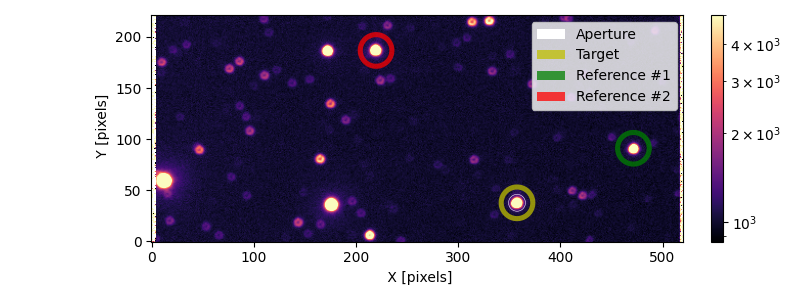

In [4]:
x_target = 357.5
y_target = 37.6

x_reference_01 = 471.5
y_reference_01 = 91.0

x_reference_02 = 219.5
y_reference_02 = 186.8

aperture = 8
inner_radius = 13
outer_radius = 18

vmin = np.amin(science_corrected[:,100:400])
vmax = np.amax(science_corrected[:,100:400])
print('vmin:  {0:.1f}    vmax: {1:.1f}'.format(vmin, vmax))
vmax = 5000

fig, ax = plt.subplots(1, figsize=(8,3))
im1 = plt.imshow(science_corrected, cmap=plt.colormaps['magma'], norm=colors.LogNorm(vmin=vmin, vmax=vmax), origin='lower')
plt.colorbar(im1,ax=ax, fraction=0.046, pad=0.04)

make_circle_around_star(x_target, y_target, aperture, label='Aperture')

make_annulus_around_star(x_target, y_target, inner_radius, outer_radius, label='Target')
make_annulus_around_star(x_reference_01, y_reference_01, inner_radius, outer_radius, label='Reference #1', color='g')
make_annulus_around_star(x_reference_02, y_reference_02, inner_radius, outer_radius, label='Reference #2', color='r')

plt.xlabel(' X [pixels]')
plt.ylabel(' Y [pixels]')
ax.legend()
plt.tight_layout()
plt.show()

## Importing the *AperturePhotometry* class

The best way to use a class is to save it in an external *.py* file to import it effortlessly and safely in several Jupyter notebooks, for example, if you want to test different aperture values or reference stars. 


In this example, I save the class `AperturePhotometry` inside the file `aperture_class.py`. The standard approach to load the class is to use the line:
```python
from aperture_class import AperturePhotometry
```
Notice how the file name is called without extension. 
The drawback of this approach - and classes in general - is that you will only notice errors, or *bugs*, when initializing the class or using one of its methods. 
Regardless of your experience, writing such a complex class without *any* mistakes is nearly impossible, and even a typo may prevent your class from working. Inevitably, you will need to do some *debugging*.
To fix any errors, you must edit the file where your class is saved and reload it again.  However, python is following an [*import-only-once rule*](https://stackoverflow.com/questions/65655755/why-does-python-import-only-once), so rerunning the above command will not import the updated class. Consequently, you will keep getting the same error even if it is now fixed in the script file, as you will still be working with the class imported early on before fixing the problem.
There are two workarounds for this problem:
- reload the kernel, but you need to run all the cells again
- at least during the debugging phase, import the class in the following way to ensure that the most updated version of the class is imported:
```python
from importlib import reload     # you need to run this line only once 
import aperture_class            # you need to run this line only once 

# for the next line to work, aperture_class must be imported once already 
reload(aperture_class)           
# we finally get the most updated version of AperturePhotometry
from aperture_class import AperturePhotometry 
```


In [5]:
from importlib import reload
import aperture_class

reload(aperture_class)
from aperture_class import AperturePhotometry

## Extracting the aperture photometry

We now use the `AperturePhotometry` class to perform aperture photometry on the target and two reference stars. For your target, do not select more than three reference stars among the brightest in the field of view, other than the target star. \
Initialization, attributes, and methods may change depending on the way you have coded your `AperturePhotometry` class.

In [6]:
aperture = 8
inner_radius = 13
outer_radius = 18

target_ap08 = AperturePhotometry()
#target_ap08.provide_aperture_parameters(inner_radius, outer_radius, aperture, x_target, y_target)
target_ap08.aperture_photometry(inner_radius, outer_radius, aperture, x_target, y_target)

reference01_ap08 = AperturePhotometry()
#reference01_ap08.provide_aperture_parameters(inner_radius, outer_radius, aperture, x_reference_01, y_reference_01)
reference01_ap08.aperture_photometry(inner_radius, outer_radius, aperture, x_reference_01, y_reference_01)

reference02_ap08 = AperturePhotometry()
#reference02_ap08.provide_aperture_parameters(inner_radius, outer_radius, aperture, x_reference_02, y_reference_02)
reference02_ap08.aperture_photometry(inner_radius, outer_radius, aperture, x_reference_02, y_reference_02)

/Users/giadaaggio/Desktop/astrolab_git/exoplanet_lab2023/WASP-12 LAB/TASTE/aperture_class.py:32: RuntimeWarning: divide by zero encountered in divide
  science_corrected = science_debiased / self.median_normalized_flat
/Users/giadaaggio/Desktop/astrolab_git/exoplanet_lab2023/WASP-12 LAB/TASTE/aperture_class.py:32: RuntimeWarning: invalid value encountered in divide
  science_corrected = science_debiased / self.median_normalized_flat
/Users/giadaaggio/Desktop/astrolab_git/exoplanet_lab2023/WASP-12 LAB/TASTE/aperture_class.py:36: RuntimeWarning: divide by zero encountered in divide
  science_corrected_errors = science_corrected * np.sqrt((science_debiased_errors/science_debiased)**2 + (self.median_normalized_flat_errors/self.median_normalized_flat)**2)
/Users/giadaaggio/Desktop/astrolab_git/exoplanet_lab2023/WASP-12 LAB/TASTE/aperture_class.py:36: RuntimeWarning: invalid value encountered in multiply
  science_corrected_errors = science_corrected * np.sqrt((science_debiased_errors/scienc

At this stage, we can already convert the time stamp of each exposure, expressed in Julian date at the beginning of the exposure, in the [Coordinated Universal Time (UTC) standard](https://en.wikipedia.org/wiki/Coordinated_Universal_Time), into the [Barycentric Julian Date in the Barycentric Dynamical Time (BJD_TDB) standard](https://ui.adsabs.harvard.edu/abs/2010PASP..122..935E/abstract). 

As we are interested in the timing of the planetary transit, it is sufficient to convert the timing of our science exposures only once, using the coordinates of the target star, and use the newly derived time array for the rest of our analysis. 

In [7]:
from astropy.time import Time


# T0: from the header of the first scientific frame 
# JD = 2458847.272929 / JD at start
jd = target_ap08.julian_date + target_ap08.exptime/86400./2. 

print(jd)

tm = Time(jd, format='jd', scale='utc', location=('45.8472d', '11.569d')) 

# Asiago - Cima Ekar
# 45° 50' 50'' N -> 45.8472
# 11° 34' 08'' E -> 11.569

# Conversion from JD-UTC to TDB
# tm.tdb[:5]
# BUT: the results would be in Earth barycentric system. 
# In order to move from the Earth BC to the Solar System BC 
# we have to correct for the "light travel time", i.e.,
# the time required by the light to travel between Earth 
# and the Solar System barycenter 

from astropy import coordinates as coord, units as u
target = coord.SkyCoord('06:30:32.80', '+29:40:20.26', 
                        unit=(u.hourangle, u.deg), frame='icrs')
ltt_bary = tm.light_travel_time(target)  

bjd_tdb = jd + ltt_bary.to_value(u.day)


[2458847.27295794 2458847.27303894 2458847.27311894 ... 2458847.46521194
 2458847.46529094 2458847.46537394]


In the plot below you can see the aperture photometry of our stars and other observables of interest as a function of time. 
1) in the first panel, the flux of each star is reported. Each flux has been normalized to the value of the `normalization_index`-th observation to better compare the flux of stars with different magnitudes (and hence different absolute flux)
2) in the second panel, the airmass as a function of time is shown.
3) in the third panel, the sky flux measured around each star is reported. Higher values of the sky background may be associated with increasing airmass (light pollution due to nearby villages) but also with variable sky weather conditions, e.g., an increase in cloud coverage. This panel can be helpful if you want to exclude some observations (e.g., those affected by extremely high values of sky background) or to exclude a reference star if the associated sky background has an anomalous behaviour compared to the target stars (likely due to the presence of a contaminant star near the sky annulus). 
4) the fourth panel shows the variation of the position of the target on the CCD during the night in both horizontal and vertical directions. In this example, the variation is relative to the position measured in the first scientific frame, but any frame can be chosen. You may want to exclude observations affected by sudden jumps 
5) The last panel shows the FWHM of the target, in both directions. This information will only be included in your class if you implement the FWHM determination correctly in the `AperturePhotometry` class.

Mind the several tricks to improve the readability of the plot. 

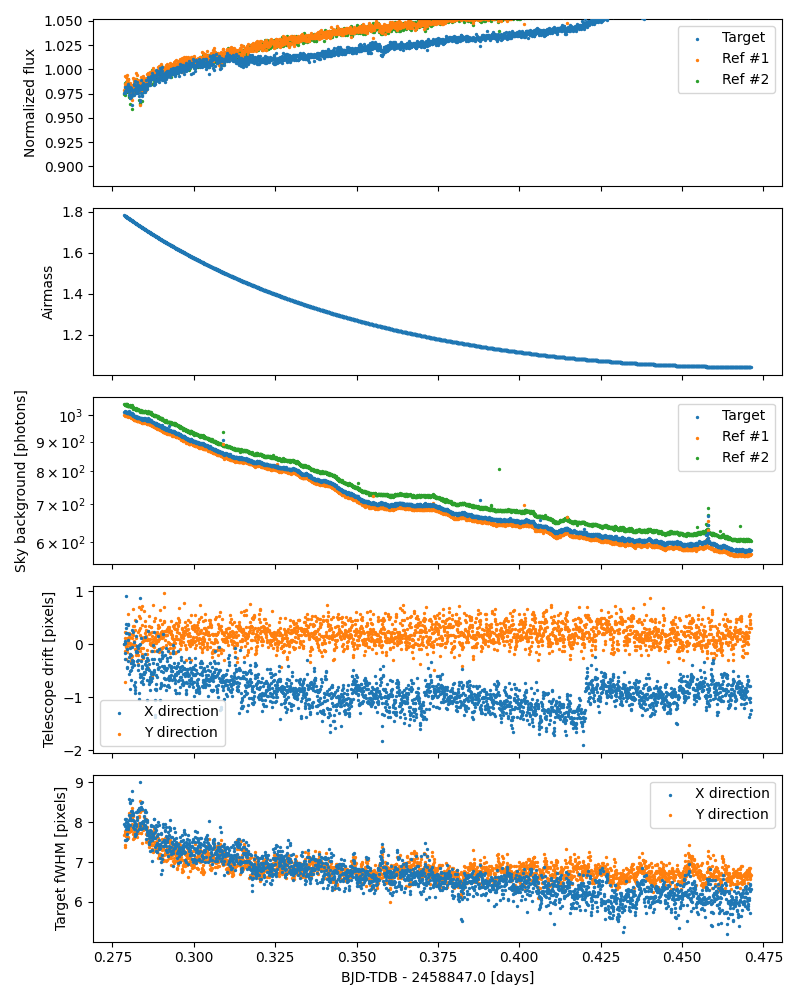

In [8]:
normalization_index = 200
time_offset = 2458847     #2459318.0 valore messo dal prof

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(8,10))
# Reduce vertical space between axes
fig.subplots_adjust(hspace=0.05)

axs[0].scatter(bjd_tdb-time_offset, target_ap08.aperture/target_ap08.aperture[normalization_index], s=2, zorder=3, c='C0', label='Target')
axs[0].scatter(bjd_tdb-time_offset, reference01_ap08.aperture/reference01_ap08.aperture[normalization_index], s=2, zorder=2, c='C1', label='Ref #1')
axs[0].scatter(bjd_tdb-time_offset, reference02_ap08.aperture/reference02_ap08.aperture[normalization_index], s=2, zorder=1, c='C2', label='Ref #2')
axs[0].set_yticks(np.arange(0.90, 1.1, 0.025))
axs[0].set_ylim(0.88, 1.052)
axs[0].set_ylabel('Normalized flux')
axs[0].legend()

axs[1].scatter(bjd_tdb-time_offset, target_ap08.airmass, s=2, c='C0', label='Airmass')
axs[1].set_ylabel('Airmass')

axs[2].scatter(bjd_tdb-time_offset, target_ap08.sky_background, s=2, zorder=3, c='C0', label='Target')
axs[2].scatter(bjd_tdb-time_offset, reference01_ap08.sky_background, s=2, zorder=2, c='C1', label='Ref #1')
axs[2].scatter(bjd_tdb-time_offset, reference02_ap08.sky_background, s=2, zorder=1, c='C2', label='Ref #2')
axs[2].set_ylabel('Sky background [photons]')
axs[2].set_yscale('log')
axs[2].legend()

axs[3].scatter(bjd_tdb-time_offset, target_ap08.x_refined-target_ap08.x_refined[0], s=2, zorder=3, c='C0', label='X direction')
axs[3].scatter(bjd_tdb-time_offset, target_ap08.y_refined-target_ap08.y_refined[0], s=2, zorder=2, c='C1', label='Y direction')
axs[3].set_ylabel('Telescope drift [pixels]')
axs[3].legend()


axs[4].scatter(bjd_tdb-time_offset, target_ap08.x_fwhm, s=2, zorder=3, c='C0', label='X direction')
axs[4].scatter(bjd_tdb-time_offset, target_ap08.y_fwhm, s=2, zorder=2, c='C1', label='Y direction')
axs[4].set_ylabel('Target fWHM [pixels]')
axs[4].legend()


axs[4].set_xlabel('BJD-TDB - {0:.1f} [days]'.format(time_offset))
plt.tight_layout()
plt.show()

## Computing the differential photometry

Focusing on the target star in the first panel shows that the absolute flux is highly variable during the night. You may have acknowledged that these variations can be seen due to changes in the atmospheric seeing, weather conditions, the Moon's phase and the telescope's angle (how much atmosphere it looks through). These will influence how many photons fall onto the pixels within a CCD and, consequently, how bright the star is measured. 

Comparing the flux of the target star with the flux of the reference stars highlights how these effects simultaneously affect all the stars. The planet's transit in the target star is barely visible as a depression in the flux compared to the reference stars. The measurements need to be corrected for these effects. 

   Comparison stars appear in the same field of view as your target object and, therefore, will be affected similarly by the factors discussed. So, by measuring comparison stars and your target object in each image, any variations that the comparison stars display can be attributed to environmental factors/seeing effects and can be used to correct the measurements of your target object. In other words, the comparison stars are measured and used as a reference (hence *reference stars*) to cancel out the instrumental effects in the measurements of the target star.

If we assume that these effects (seeing variation, weather conditions, increase in background luminosity) affect the observed fluxes proportionally, e.g., an increase in cloud coverage causes a decrease in the flux of a factor that is the same for all the stars. We can remove these effects by dividing the flux of the target star by the flux of the reference star. To increase the precision of our correction, we can also divide the flux tìof the target star by *the sum* of the fluxes of the reference stars, including only those reference stars that do not show anomalous behaviour (e.g., strange variation in the absolute flux or sky background not observed in other stars)

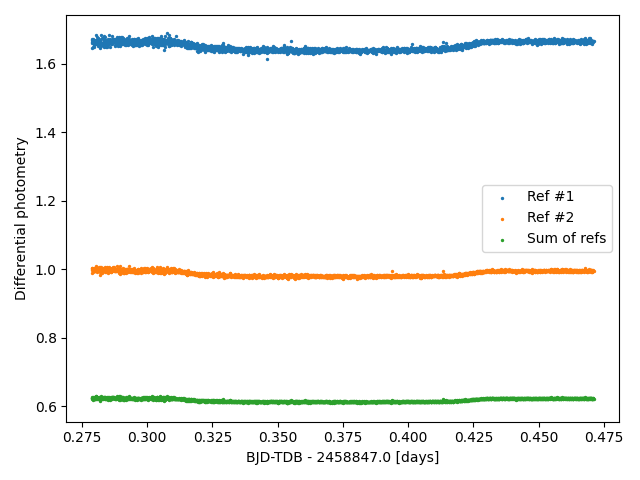

In [9]:
plt.figure()
plt.scatter(bjd_tdb-time_offset, target_ap08.aperture/reference01_ap08.aperture, s=2, label='Ref #1')
plt.scatter(bjd_tdb-time_offset, target_ap08.aperture/reference02_ap08.aperture, s=2, label='Ref #2')
plt.scatter(bjd_tdb-time_offset, target_ap08.aperture/(reference01_ap08.aperture+reference02_ap08.aperture), s=2, label='Sum of refs')
plt.xlabel('BJD-TDB - {0:.1f} [days]'.format(time_offset))
plt.ylabel('Differential photometry')
plt.legend()
plt.tight_layout()
plt.show()

## Selection of the best differential photometry

The plot above shows the three differential photometry using the two reference stars and the sum of the flux of the two reference stars selected in this example. With the increasing flux of the reference star, the differential photometry will assume smaller values, so the plot as it is now is not highly informative, as it gives the deceiving idea that the differential photometry obtained with the fainter star (the second reference star) is the best one in highlighting the transit of the planet. 

We need to find a quantitative criterion to select the *best* differential photometry. How do we define the *best* differential photometry? Generally speaking, the answer relies on the physical phenomenon we want to study. In our specific case, we are interested in modelling the transit of the planet, and we know that in the short time around the observations, the flux of the star can be considered constant, so the measurements obtained before and after the transit provide an excellent opportunity to identify the differential photometry approach delivering the best results. As we expect a constant value of the differential photometry outside the transit, the standard deviation of this portion of the light curve can provide a quantitative criterion for selecting the best photometric extraction. 

First, we manually select the interval of exclusion of the transit. We do not need to pinpoint precisely the beginning and ending of the transit; we can be more relaxed and exclude some observations before and after the transit. What is really important is to use always the same selection (the same epochs) to compute the standard deviation across different combination of reference stars and aperture selections.



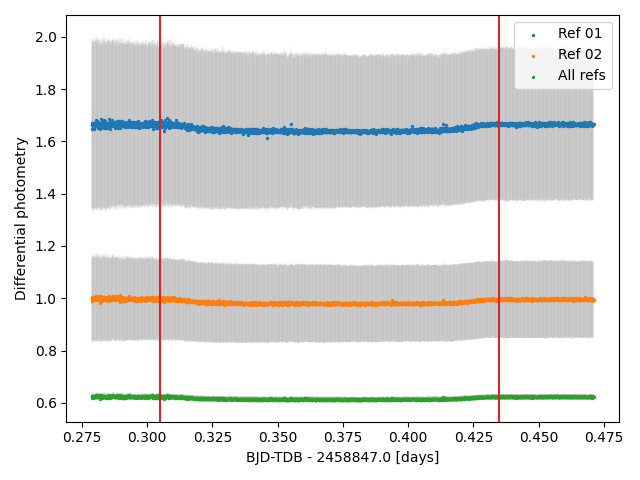

In [10]:
differential_ap08_ref01 = target_ap08.aperture/reference01_ap08.aperture
differential_ap08_ref02 = target_ap08.aperture/reference02_ap08.aperture
differential_ap08_allref = target_ap08.aperture/(reference01_ap08.aperture + reference02_ap08.aperture)

differential_ap08_ref01_error = differential_ap08_ref01*np.sqrt((target_ap08.aperture_errors/target_ap08.aperture)**2. + (reference01_ap08.aperture_errors/reference01_ap08.aperture)*2.)
differential_ap08_ref02_error = differential_ap08_ref02*np.sqrt((target_ap08.aperture_errors/target_ap08.aperture)**2. + (reference02_ap08.aperture_errors/reference02_ap08.aperture)*2.)
differential_ap08_allref_error = differential_ap08_allref*np.sqrt((target_ap08.aperture_errors/target_ap08.aperture)**2. + 
                                                                  ((reference01_ap08.aperture_errors + reference02_ap08.aperture_errors)/(reference01_ap08.aperture + reference02_ap08.aperture))**2.)

bjd_median = np.median(bjd_tdb)

plt.figure()
plt.scatter(bjd_tdb-time_offset, differential_ap08_ref01, s=2, label='Ref 01')
plt.errorbar(bjd_tdb-time_offset, differential_ap08_ref01, yerr=differential_ap08_ref01_error, fmt=' ', c='k', alpha=0.025, zorder=-1)

plt.scatter(bjd_tdb-time_offset, differential_ap08_ref02, s=2, label='Ref 02')
plt.errorbar(bjd_tdb-time_offset, differential_ap08_ref02, yerr=differential_ap08_ref02_error, fmt=' ', c='k', alpha=0.025, zorder=-1) 

plt.scatter(bjd_tdb-time_offset, differential_ap08_allref, s=2, label='All refs')
plt.errorbar(bjd_tdb-time_offset, differential_ap08_allref, yerr=differential_ap08_allref_error, fmt=' ', c='k', alpha=0.025, zorder=-1) 

plt.legend()
plt.axvline(2458847.305-time_offset, c='C3')
plt.axvline(2458847.435-time_offset, c='C3')
plt.xlabel('BJD-TDB - {0:.1f} [days]'.format(time_offset))
plt.ylabel('Differential photometry')
plt.tight_layout()
plt.show()


However, a direct comparison of the standard deviation of the differential photometry computed outside the transit is not possible, as the absolute value depends on the ratio between the brightness of the target and reference star(s). 

To better understand this point, let's do an example. Imagine two cases where the average values of the differential photometry are $df_1 = 0.8 \pm 0.2$ and $df_2 = 2.0 \pm 0.4 $, respectively. The absolute value of the standard deviation is smaller in the first case. However, the corresponding relative errors are $\epsilon_{df_1} = \sigma_{df_1} / df_1\ = 0.25$, $\epsilon_{df_2} = 0.20 $, i.e., the relative error of the second differential photometry is smaller. To properly compare the two differential photometry, we must first normalize each of them by their average values so that the `numpy.std` function will indeed provide an estimate of the relative error associated with the light curve. 

I use a polynomial trend in the following example to normalize the light curve. A linear or quadratic polynomial may be sufficient if eye inspection reveals the presence of a trend. A trend may appear if the target and reference stars have different spectral types, as the atmospheric extinction strongly depends on the wavelength. 

Finally, the standard deviation is computed on the normalized light curve.

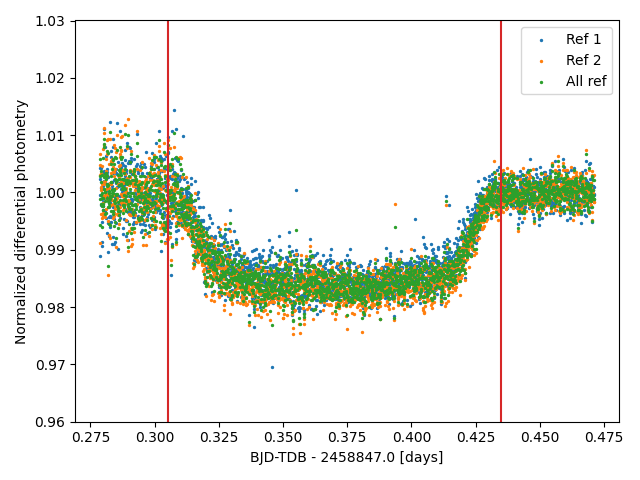

Standard deviation aperture 08 reference #1:    0.0032298
Standard deviation aperture 08 reference #2:    0.0032313
Standard deviation aperture 08 all references:  0.0027785

zero-th order coefficient for the polynomial trend:  0.6234814473898347


In [20]:

# https://numpy.org/doc/stable/reference/routines.polynomials.package.html#module-numpy.polynomial
from numpy.polynomial import Polynomial
out_transit_selection = (bjd_tdb < 2458847.305)  | ( bjd_tdb> 2458847.435)
poly_ap08_ref01_deg01_pfit = Polynomial.fit(bjd_tdb[out_transit_selection]-bjd_median, differential_ap08_ref01[out_transit_selection], deg=1)
poly_ap08_ref02_deg01_pfit = Polynomial.fit(bjd_tdb[out_transit_selection]-bjd_median, differential_ap08_ref02[out_transit_selection], deg=1)
poly_ap08_allref_deg01_pfit = Polynomial.fit(bjd_tdb[out_transit_selection]-bjd_median, differential_ap08_allref[out_transit_selection], deg=1)

differential_ap08_ref01_normalized = differential_ap08_ref01 / poly_ap08_ref01_deg01_pfit(bjd_tdb-bjd_median)
differential_ap08_ref02_normalized = differential_ap08_ref02 / poly_ap08_ref02_deg01_pfit(bjd_tdb-bjd_median)
differential_ap08_allref_normalized = differential_ap08_allref / poly_ap08_allref_deg01_pfit(bjd_tdb-bjd_median)

differential_ap08_ref01_normalized_error = np.std(differential_ap08_ref01_normalized)
differential_ap08_ref02_normalized_error = np.std(differential_ap08_ref02_normalized)
differential_ap08_allref_normalized_error = np.std(differential_ap08_allref_normalized)

plt.figure()
plt.scatter(bjd_tdb-time_offset, differential_ap08_ref01_normalized, s=2, label='Ref 1')
plt.scatter(bjd_tdb-time_offset, differential_ap08_ref02_normalized, s=2, label='Ref 2')
plt.scatter(bjd_tdb-time_offset, differential_ap08_allref_normalized, s=2, label='All ref')

plt.axvline(2458847.305-time_offset, c='C3')
plt.axvline(2458847.435-time_offset, c='C3')
plt.ylim(0.96, 1.03)

plt.xlabel('BJD-TDB - {0:.1f} [days]'.format(time_offset))
plt.ylabel('Normalized differential photometry')
plt.legend()
plt.tight_layout()
plt.show()

print('Standard deviation aperture 08 reference #1:    {0:.7f}'.format(np.std(differential_ap08_ref01_normalized[out_transit_selection])))
print('Standard deviation aperture 08 reference #2:    {0:.7f}'.format(np.std(differential_ap08_ref02_normalized[out_transit_selection])))
print('Standard deviation aperture 08 all references:  {0:.7f}'.format(np.std(differential_ap08_allref_normalized[out_transit_selection])))
print('')
print('zero-th order coefficient for the polynomial trend: ', poly_ap08_allref_deg01_pfit.coef[0])




## Using different photometric parameters 

Using the `AperturePhotometry` class is highly convenient for exploring the effects of different photometric parameters. Below, I report an example using the same reference stars but with a different aperture radius.

In [12]:
from time import time
t0 = time()

aperture = 5
inner_radius = 13
outer_radius = 18

target_ap05 = AperturePhotometry()
target_ap05.aperture_photometry(inner_radius, outer_radius, aperture, x_target, y_target)

reference01_ap05 = AperturePhotometry()
reference01_ap05.aperture_photometry(inner_radius, outer_radius, aperture, x_reference_01, y_reference_01)

reference02_ap05 = AperturePhotometry()
reference02_ap05.aperture_photometry(inner_radius, outer_radius, aperture, x_reference_02, y_reference_02)

t1 = time()
print('elapsed_time=', t1-t0)

/Users/giadaaggio/Desktop/astrolab_git/exoplanet_lab2023/WASP-12 LAB/TASTE/aperture_class.py:32: RuntimeWarning: divide by zero encountered in divide
  science_corrected = science_debiased / self.median_normalized_flat
/Users/giadaaggio/Desktop/astrolab_git/exoplanet_lab2023/WASP-12 LAB/TASTE/aperture_class.py:32: RuntimeWarning: invalid value encountered in divide
  science_corrected = science_debiased / self.median_normalized_flat
/Users/giadaaggio/Desktop/astrolab_git/exoplanet_lab2023/WASP-12 LAB/TASTE/aperture_class.py:36: RuntimeWarning: divide by zero encountered in divide
  science_corrected_errors = science_corrected * np.sqrt((science_debiased_errors/science_debiased)**2 + (self.median_normalized_flat_errors/self.median_normalized_flat)**2)
/Users/giadaaggio/Desktop/astrolab_git/exoplanet_lab2023/WASP-12 LAB/TASTE/aperture_class.py:36: RuntimeWarning: invalid value encountered in multiply
  science_corrected_errors = science_corrected * np.sqrt((science_debiased_errors/scienc

KeyboardInterrupt: 

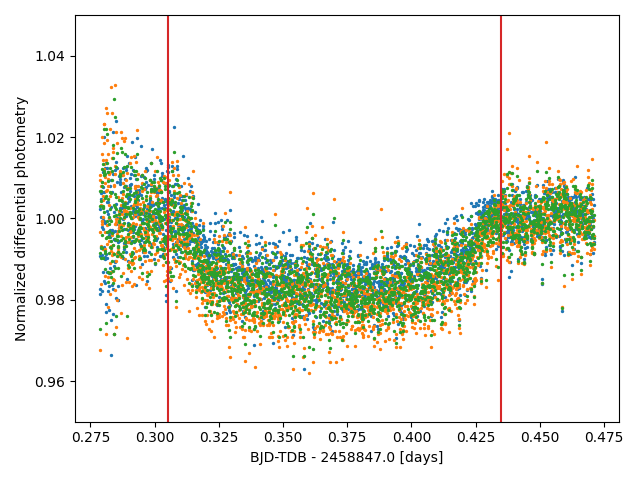

Standard deviation aperture 05 reference #1:    0.0068626
Standard deviation aperture 05 reference #2:    0.0082494
Standard deviation aperture 05 all references : 0.0064713


In [ ]:
differential_ap05_ref01 = target_ap05.aperture/reference01_ap05.aperture
differential_ap05_ref02 = target_ap05.aperture/reference02_ap05.aperture
differential_ap05_allref = target_ap05.aperture/(reference01_ap05.aperture + reference02_ap05.aperture)
bjd_median = np.median(bjd_tdb)


# https://numpy.org/doc/stable/reference/routines.polynomials.package.html#module-numpy.polynomial
from numpy.polynomial import Polynomial
#out_transit_selection = (bjd_tdb < 2459318.46509)  | ( bjd_tdb> 2459318.6100)
poly_ap05_ref01_deg01_pfit = Polynomial.fit(bjd_tdb[out_transit_selection]-bjd_median, differential_ap05_ref01[out_transit_selection], deg=1)
poly_ap05_ref02_deg01_pfit = Polynomial.fit(bjd_tdb[out_transit_selection]-bjd_median, differential_ap05_ref02[out_transit_selection], deg=1)
poly_ap05_allref_deg01_pfit = Polynomial.fit(bjd_tdb[out_transit_selection]-bjd_median, differential_ap05_allref[out_transit_selection], deg=1)

differential_ap05_ref01_normalized = differential_ap05_ref01 / poly_ap05_ref01_deg01_pfit(bjd_tdb-bjd_median)
differential_ap05_ref02_normalized = differential_ap05_ref02 / poly_ap05_ref02_deg01_pfit(bjd_tdb-bjd_median)
differential_ap05_allref_normalized = differential_ap05_allref / poly_ap05_allref_deg01_pfit(bjd_tdb-bjd_median)

plt.figure()
plt.scatter(bjd_tdb-time_offset, differential_ap05_ref01_normalized, s=2)
plt.scatter(bjd_tdb-time_offset, differential_ap05_ref02_normalized, s=2)
plt.scatter(bjd_tdb-time_offset, differential_ap05_allref_normalized, s=2)

plt.axvline(2458847.305-time_offset, c='C3')
plt.axvline(2458847.435-time_offset, c='C3')
plt.ylim(0.95, 1.05)
plt.xlabel('BJD-TDB - {0:.1f} [days]'.format(time_offset))
plt.ylabel('Normalized differential photometry')
plt.tight_layout()
plt.show()



print('Standard deviation aperture 05 reference #1:    {0:.7f}'.format(np.std(differential_ap05_ref01_normalized[out_transit_selection])))
print('Standard deviation aperture 05 reference #2:    {0:.7f}'.format(np.std(differential_ap05_ref02_normalized[out_transit_selection])))
print('Standard deviation aperture 05 all references : {0:.7f}'.format(np.std(differential_ap05_allref_normalized[out_transit_selection])))


By comparing the standard deviation of the normalized differential photometries, in my case, the best result is obtained using an aperture of 8 pixels and by summing together the fluxes of the two reference stars. Depending on the weather conditions and the peculiarities of your target and reference stars, you may get better results with another combination of aperture and reference stars. Note that the brightest star may not necessarily be the best reference if, for example, the reference star is in a binary system with the companion partially entering and exiting the aperture radius or the sky annulus with varying seeing. 

Finally, we save the differential light curve and the associated values into a file for later use. 
**Note**: do not forget to compute the errors associated with the differential photometry. 

In [ ]:
pickle.dump(bjd_tdb, open('output_files/taste_bjdtdb.p','wb'))
pickle.dump(differential_ap08_ref01_normalized, open('output_files/differential_ap08_ref01_normalized.p','wb'))
pickle.dump(differential_ap08_ref01_normalized_error, open('output_files/differential_ap08_ref01_normalized_error.p','wb'))
pickle.dump(differential_ap08_allref_normalized, open('output_files/differential_ap08_allref_normalized.p','wb'))
pickle.dump(differential_ap08_allref_normalized_error, open('output_files/differential_ap08_allref_normalized_error.p','wb'))

pickle.dump(differential_ap08_ref01, open('output_files/differential_ap08_ref01.p','wb'))
pickle.dump(differential_ap08_ref01_error, open('output_files/differential_ap08_ref01_error.p','wb'))

pickle.dump(differential_ap08_allref, open('output_files/differential_ap08_allref.p','wb'))
pickle.dump(differential_ap08_allref_error, open('output_files/differential_ap08_allref_error.p','wb'))

